In [2]:
import os
from md_diffusion import read_position_array
from msd_fft import calculate_diffusion_coefficient
import matplotlib.pyplot as plt
import numpy as np
import yaml

### Read log files

In [3]:
data_dir = '/home/kutay/Documents/git/Nanocar/diffusion/docs/data'

### Save numpy array and run diffusivity calcualtion

In [15]:
ALL_DATA = {}
for sim_type in ['flexible', 'rigid']:
    DATA = {}
    simdir = '%s/%s' % (data_dir, sim_type)
    for molecule in os.listdir(simdir):
        mol_simdir = os.path.join(simdir, molecule)
        pos_array = read_position_array(mol_simdir, directions=['y'], t_skip=2, log='log.%s' % molecule)
        DATA[molecule.split('_')[0]] = calculate_diffusion_coefficient(pos_array, average_frames=1, fs_per_frame=1000)
    ALL_DATA[sim_type] = DATA

Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
DC_Cu110 | Shape: (8001 frames, 10 runs, 3 dimensions) | Saved: None
Best fit: (1.20 - 3.20 ns; $R^2$ = 0.999):
D = 5.244E-05 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
PCARBORANE_Cu110 | Shape: (8001 frames, 10 runs, 3 dimensions) | Saved: None
Best fit: (1.60 - 3.60 ns; $R^2$ = 0.999):
D = 1.257E-04 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
C60_Cu110 | Shape: (8001 frames, 10 runs, 3 dimensions) | Saved: None
Best fit: (1.60 - 3.60 ns; $R^2$ = 0.999):
D = 6.169E-05 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
TPEE_Cu110 | Shape: (8001 frames, 10 runs, 3 dimensions) | Saved: None
Best fit: (0.80 - 2.80 ns; $R^2$ = 0.996):
D = 6.193E-05 $cm^2 / s$
Run ids:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8

### Read molecule diffusion info

In [5]:
with open('diff_data.yaml', 'r') as f:
    diff_data = yaml.load(f)

#### Sort molecules according to molecular weight

In [6]:
molecules = list(diff_data['mw'].keys())
mol_order = np.argsort([diff_data['mw'][i] for i in molecules])
molecules = [molecules[i] for i in mol_order]
colors = dict(r='#CF5955', y='#EAC658', g='#66AD9B', b='#4e7fad')
shades = dict(r='#672C2A', y='#75632C', g='#33564D', b='#3B4C5C')

In [7]:
d_flex = [ALL_DATA['flexible'][m]['best']['cm2/s'] for m in molecules]
d_rigid = [ALL_DATA['rigid'][m]['best']['cm2/s'] for m in molecules]
d_dctst = [diff_data['dctst'][i] for i in molecules]
mw = [diff_data['mw'][i] for i in molecules]

### Plot D vs MW (each method together)

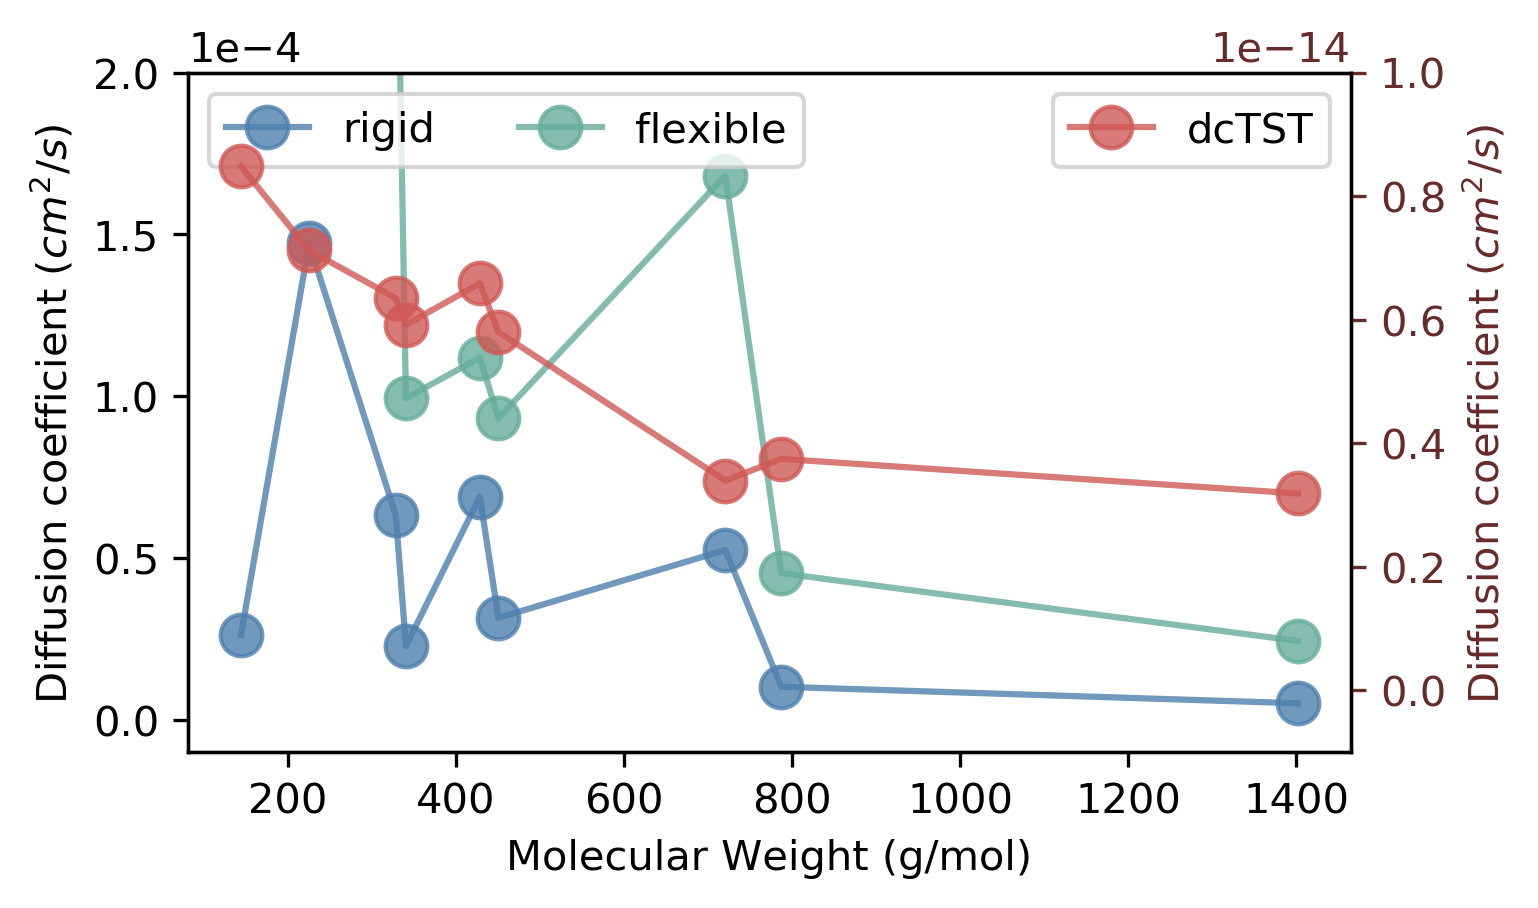

In [8]:
fig = plt.figure(figsize=(5, 3), dpi=300)
fig.subplots_adjust(hspace=.5, wspace=.25)

ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(mw, d_rigid, '-o', markersize=10, alpha=0.8, c=colors['b'])
ax1.plot(mw, d_flex, '-o', markersize=10, alpha=0.8, c=colors['g'])
ax1.set_ylim(-1e-5, 2e-4)
ax1.legend(['rigid', 'flexible'], ncol=2, loc=2)
ax1.set_ylabel('Diffusion coefficient $(cm^2/s)$')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Molecular Weight (g/mol)')

ax2 = ax1.twinx()
ax2.plot(mw, d_dctst, '-o', markersize=10, alpha=0.8, c=colors['r'])
ax2.set_ylim(-1e-15, 1e-14)
ax2.legend(['dcTST'], loc=1)
ax2.set_ylabel('Diffusion coefficient $(cm^2/s)$', color=shades['r'])
ax2.tick_params('y', colors=shades['r'])

Text(0.5,0,'Molecular weight (g/mol)')

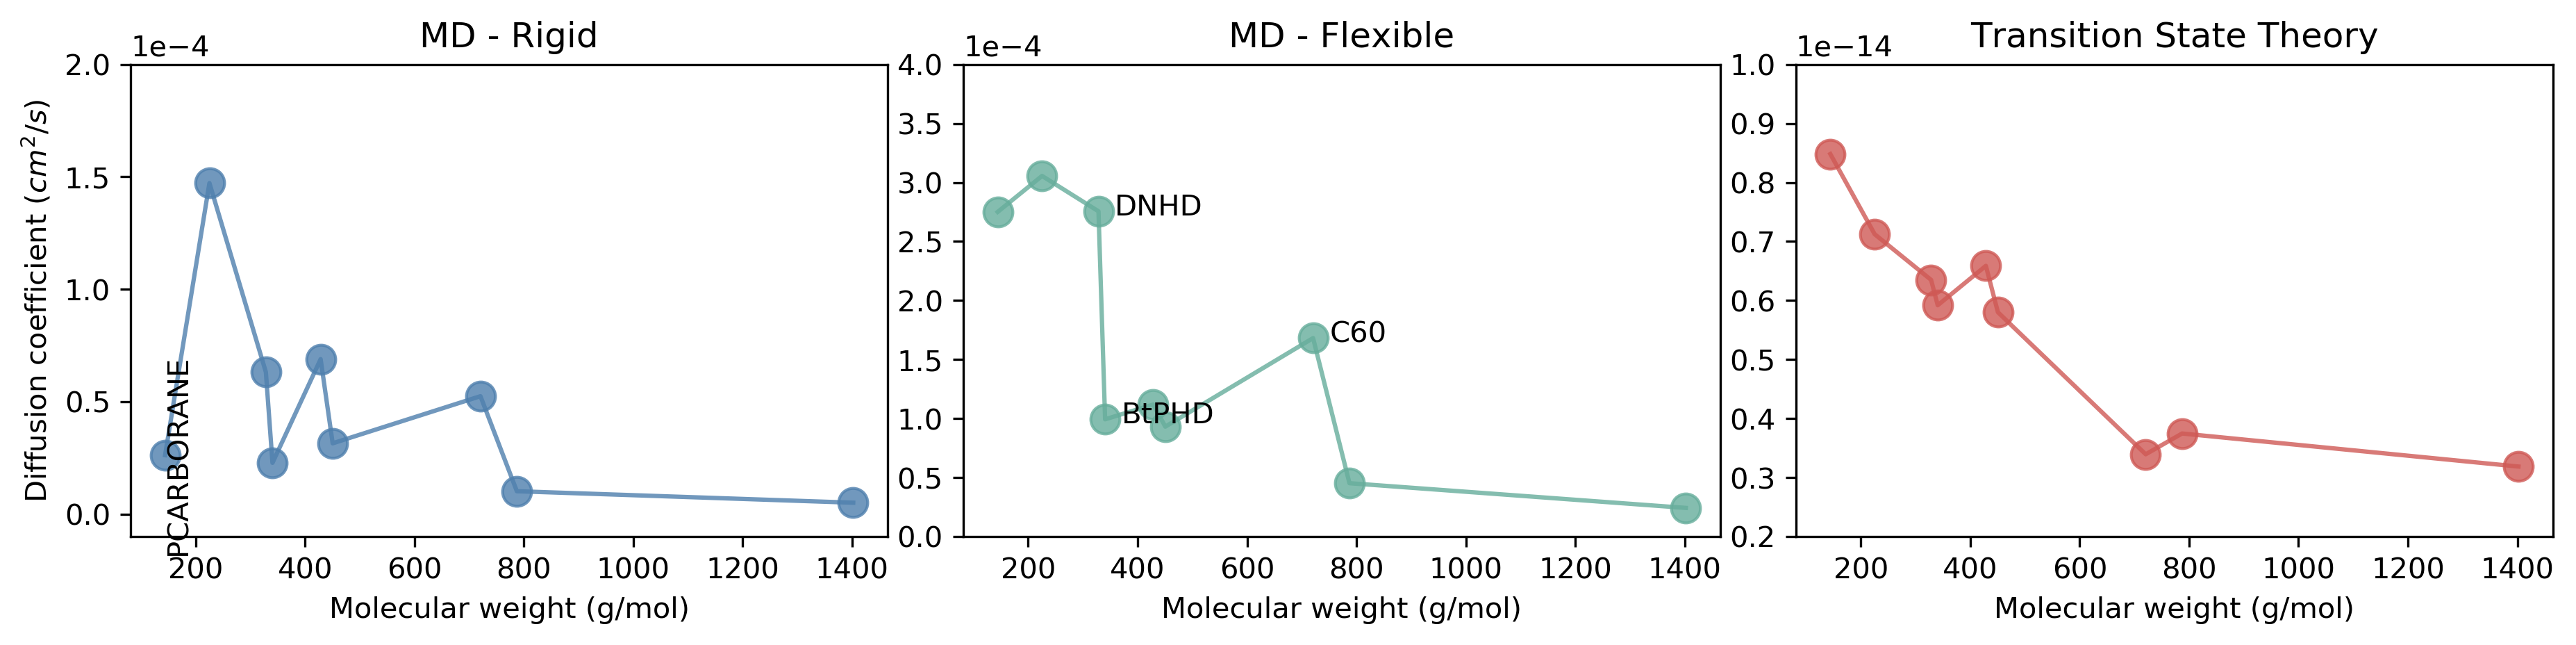

In [12]:
fig = plt.figure(figsize=(15, 3), dpi=300)
fig.subplots_adjust(hspace=.5, wspace=.1)

# RIGID
ax1 = fig.add_subplot(1, 3, 1, title='MD - Rigid')
ax1.plot(mw, d_rigid, '-o', markersize=10, alpha=0.8, c=colors['b'])
ax1.set_ylim(-1e-5, 2e-4)
ax1.set_ylabel('Diffusion coefficient $(cm^2/s)$')
ax1.set_xlabel('Molecular weight (g/mol)')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
for mol_idx in [0]:
    ax1.text(mw[mol_idx], d_rigid[mol_idx], molecules[mol_idx], verticalalignment='center', rotation='vertical')

# FLEXIBLE
ax1 = fig.add_subplot(1, 3, 2, title='MD - Flexible')
ax1.plot(mw, d_flex, '-o', markersize=10, alpha=0.8, c=colors['g'])
ax1.set_ylim(0, 4e-4)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Molecular weight (g/mol)')
for mol_idx in [2, 3, 6]:
    ax1.text(mw[mol_idx] + 30, d_flex[mol_idx] - 3.3e-6, molecules[mol_idx])

# DCTST
ax1 = fig.add_subplot(1, 3, 3, title='Transition State Theory')
ax1.plot(mw, d_dctst, '-o', markersize=10, alpha=0.8, c=colors['r'])
ax1.set_ylim(2e-15, 1e-14)
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax1.set_xlabel('Molecular weight (g/mol)')